## Task 1 - Prediction using Supervised ML


#### Data Science & Business Analytics Internship

#### By:  Swathi Muthe

#### Problem Statement:

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.

## Step 1: Reading and Understanding the Data



In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#### Importing the dataset

In [34]:
datalink = 'http://bit.ly/w-data'
df_scores = pd.read_csv(datalink)
df_scores.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Inspecting the dataset

In [4]:
#let us check the number of rows and columns
df_scores.shape

(25, 2)

In [5]:
#let us check the number of columns in the dataset
df_scores.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
# Let us see complete information about the dataframe with column details and null values present in the data set.
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are no null values in the data set

In [7]:
#check the summary of the dataframe
df_scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


There are no outliers in the data.

 ## Step 2: EDA - Preparing Data for Modelling

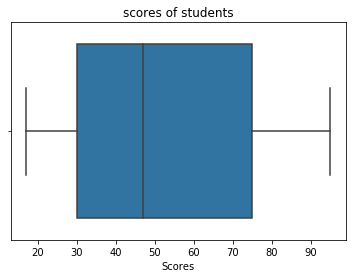

In [8]:
sns.boxplot(x = 'Scores', data = df_scores)
plt.title('scores of students')
plt.show()

There are no outliers in the data. The average scores of the students is between 45-50

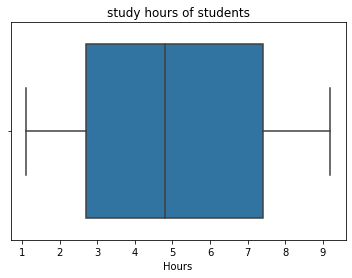

In [9]:
sns.boxplot(x = 'Hours', data = df_scores)
plt.title('study hours of students')
plt.show()

There are no outliers in the data. The average study hours of the students is between 4 to 5.

Text(0.5, 1.0, 'Hours vs scores')

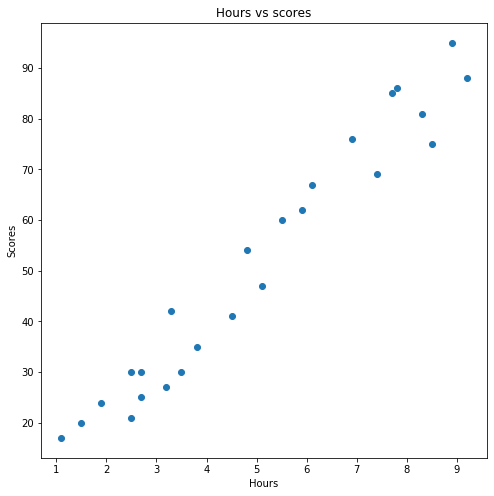

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(x = 'Hours', y = 'Scores', data = df_scores)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Hours vs scores")

Study hours of the students and scores are linearly related.


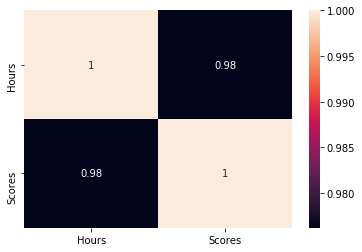

In [37]:
sns.heatmap(df_scores.corr(), annot = True)
plt.show()

It is visible from the heatmap, the variable hours seems to be most correlated with scores. 


## Step 3: Data Preparation


In [11]:
# checking for missing values
df_scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values present in the data set.

## Step 4: Splitting the Data into Training and Testing Set

In [12]:
X = df_scores['Hours']
y = df_scores['Scores']

In [13]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17,)
(8,)
(17,)
(8,)


In [15]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [16]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    1.495142
Hours    9.871714
dtype: float64

In [17]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           1.15e-11
Time:                        22:06:17   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

Looking at some key statistics from the summary

The coefficients and significance (p-values) are siginificant.
1. The coefficient for hours is 9.87, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.957
Meaning that 95.7% of the variance in scores is explained by hours

This is a decent R-squared value.

From the parameters that we get, our linear regression equation becomes:
Scores = 1.4951 + 9.8717 * Hours

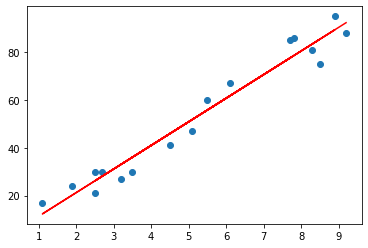

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.4951 + 9.8717*X_train, 'r')
plt.show()

In [19]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

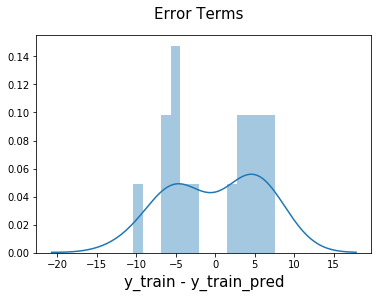

In [20]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                   
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

It can be seen that the error terms are normally distributed with mean 0.
Hence validated one of the assumptions of Linear Regression



#### Looking for patterns in the residuals

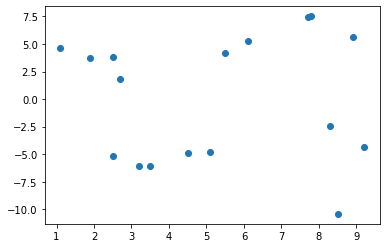

In [41]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. 
The normality of residual terms allows some inference on the coefficients.

### Step 5: Predictions on the Test Set


In [22]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [23]:
y_pred.head()

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
dtype: float64

In [24]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

5.067387845160841

###### Checking the R-squared on the test set

In [25]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9309458862687439

##### Visualizing the fit on the test set

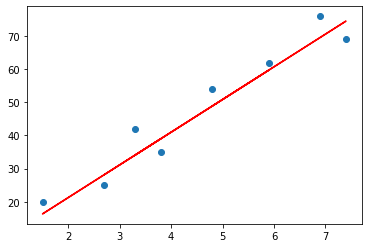

In [26]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.4951 + 9.8717 * X_test, 'r')
plt.show()

#### Linear Regression using linear_model in sklearn


In [28]:
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
X_train_lm.shape

(17,)

In [30]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [31]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(17, 1)
(17,)
(8, 1)
(8,)


In [32]:
lm = LinearRegression()
# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print(lm.intercept_)
print(lm.coef_)

1.495142109236383
[9.87171443]


The equation we get is the same as what we got before!

Scores = 1.495 + 9.8717* Hours

### Evaluating the model


In [40]:
#Checking r - square of sklearn model
y_train_pred_lm = lm.predict(X_train_lm)
r2score_train = r2_score(y_true=y_train_lm, y_pred=y_train_pred_lm)
print('R2_score using sklearn model: ', (r2score_train)*100)

R2_score using sklearn model:  95.70735354094693
